In [38]:
%pylab inline

import lxml
from lxml import etree
import json
import os.path as op
import glob

Populating the interactive namespace from numpy and matplotlib


# Hello world!

In [39]:
# pth = r"E:\data\scaffold\Hamamatsu\PIG-003_J-18-0165_HE.ndpi.ndpa"
pth = r"E:/data/scaffold/Hamamatsu/PIG-008_P008 LL-P_HE_parenchyme perif..ndpi.ndpa"

tree = etree.parse(pth)

In [40]:
etree.tostring(tree)

b'<annotations>\n    <ndpviewstate id="1">\n        <title/>\n        <details/>\n        <coordformat>nanometers</coordformat>\n        <lens>6,003843</lens>\n        <x>6028294</x>\n        <y>135608</y>\n        <z>0</z>\n        <showtitle>0</showtitle>\n        <showhistogram>0</showhistogram>\n        <showlineprofile>0</showlineprofile>\n        <annotation type="freehand" displayname="AnnotateFreehand" color="#00ff00">\n            <measuretype>0</measuretype>\n            <closed>1</closed>\n            <pointlist>\n                <point>\n                    <x>5513077</x>\n                    <y>-24082</y>\n                </point>\n                <point>\n                    <x>5510048</x>\n                    <y>-21050</y>\n                </point>\n                <point>\n                    <x>5508536</x>\n                    <y>-18018</y>\n                </point>\n                <point>\n                    <x>5503992</x>\n                    <y>-11955</y>\n       

In [41]:
viewstates = tree.xpath("//ndpviewstate")
viewstate = viewstates[1]
display(viewstate.xpath(".//title/text()"))
ptlists = viewstate.xpath(".//pointlist")
ptlist = ptlists[0]
ptlist.getchildren()
tree.getpath(ptlist)

[]

'/annotations/ndpviewstate[2]/annotation/pointlist'

In [43]:
viewstate.xpath("./coordformat/text()")[0]

'nanometers'

In [7]:
anotations = tree.xpath("//annotation")
anot = anotations[0]
anot.get("color")
display(anot.items())
an_color = anot.get("color")

[('type', 'freehand'),
 ('displayname', 'AnnotateFreehand'),
 ('color', '#0000ff')]

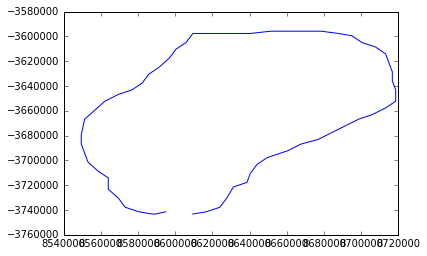

In [8]:
    
an_x = list(map(int, anot.xpath(".//pointlist/point/x/text()")))
an_y = list(map(int, anot.xpath(".//pointlist/point/y/text()")))
plt.plot(an_x, an_y, color=an_color)



# Function

In [9]:
def get_one_annotation(viewstate):
    titles_list = viewstate.xpath(".//title/text()")
    if len(titles_list) == 0:
        an_title = ""
    elif len(titles_list) == 1:
        an_title = titles_list[0]
    else:
        raise ValueError("More than one title in viewstate")
    
    annotations = viewstate.xpath(".//annotation")
    if len(annotations) > 1:
        raise ValueError("More than one annotation found")
    annot = annotations[0]
    an_color = annot.get("color")
#     display(len(annotation))
    an_x = list(map(int, annot.xpath(".//pointlist/point/x/text()")))
    an_y = list(map(int, annot.xpath(".//pointlist/point/y/text()")))
    return dict(title=an_title, color=an_color, x=an_x, y=an_y)
    
    
get_one_annotation(viewstates[2])

{'title': 'inner lobulus 2',
 'color': '#00ff00',
 'x': [9102098,
  9102098,
  9102098,
  9102098,
  9094823,
  9087549,
  9083912,
  9076638,
  9069366,
  9069366,
  9080276,
  9094823,
  9105735,
  9113008,
  9120281,
  9120281,
  9123920,
  9127557,
  9127557,
  9127557,
  9127557,
  9127557,
  9127557,
  9127557,
  9127557,
  9127557,
  9123920,
  9120281,
  9113008,
  9109370,
  9105735,
  9102098,
  9102098,
  9102098,
  9098460,
  9098460,
  9102098,
  9102098,
  9102098,
  9102098,
  9102098,
  9098460,
  9098460,
  9098460,
  9098460,
  9098460,
  9098460,
  9098460,
  9094823,
  9091187,
  9102098,
  9127557,
  9156653,
  9174838,
  9193022,
  9218481,
  9233029,
  9243940,
  9258487,
  9276672,
  9291221,
  9305770,
  9327591,
  9342139,
  9360325,
  9367598,
  9367598,
  9367598,
  9363959,
  9363959,
  9363959,
  9360325,
  9356687,
  9345778,
  9331227,
  9316680,
  9302133,
  9287584,
  9273037,
  9258487,
  9243940,
  9225755,
  9229392,
  9243940,
  9265762,
  9291221,

In [10]:
viewstates = tree.xpath("//ndpviewstate")
all_anotations = list(map(get_one_annotation, viewstates))

In [11]:
all_anotations

[{'title': '',
  'color': '#0000ff',
  'x': [8594940,
   8589488,
   8587669,
   8580395,
   8573126,
   8569488,
   8564036,
   8564036,
   8558581,
   8553128,
   8551309,
   8549493,
   8549493,
   8551309,
   8556762,
   8562219,
   8569488,
   8576760,
   8582212,
   8585850,
   8591302,
   8596759,
   8600393,
   8605850,
   8609486,
   8618576,
   8627664,
   8640388,
   8651296,
   8660386,
   8667660,
   8678569,
   8687659,
   8694929,
   8700383,
   8707653,
   8713109,
   8714928,
   8716743,
   8716743,
   8718562,
   8718562,
   8713109,
   8705836,
   8698567,
   8691293,
   8684021,
   8676750,
   8667660,
   8660386,
   8649481,
   8644028,
   8640388,
   8638572,
   8631300,
   8627664,
   8624028,
   8616755,
   8609486],
  'y': [-3741424,
   -3743241,
   -3743241,
   -3741424,
   -3737782,
   -3730502,
   -3723218,
   -3714119,
   -3708660,
   -3701377,
   -3694100,
   -3686817,
   -3679535,
   -3666794,
   -3659518,
   -3652234,
   -3646775,
   -3643135,
   -363767

In [12]:
fn = "annotations.json"
with open(fn, 'w') as outfile:
    json.dump(all_anotations, outfile)

# Convert from .ndpa to .json

In [13]:


def ndpa_file_to_json(pth):
    tree = etree.parse(pth)
    viewstates = tree.xpath("//ndpviewstate")
    all_anotations = list(map(get_one_annotation, viewstates))
    fn = pth + ".json"
    with open(fn, 'w') as outfile:
        json.dump(all_anotations, outfile)

In [14]:
# pth = r"E:\data\scaffold\Hamamatsu\PIG-003_J-18-0165_HE.ndpi.ndpa"
# ndpa_file_to_json(pth)

# Convert whole directory

In [29]:
def ndpa_to_json(path):
    """
    :param path: path to file or dir contaning .ndpa files
    """
    if op.isfile(path):
        ndpa_file_to_json(path)
    else:
        extended_path = op.join(path, "*.ndpa")
#         print(extended_path)
        files = glob.glob(extended_path)
        for fl in files:
            ndpa_file_to_json(fl)
        
    
    

In [37]:
ndpa_to_json(r"e:data/scaffold/Hamamatsu/")